In [9]:
# import library
import os
from glob import glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import math
from collections import defaultdict

In [95]:
# Define the directory path
image_dir = '/scratch/nf33/bz5571/Station27/crops'

# Retrieve all PNG image paths, including subdirectories
image_paths = glob(os.path.join(image_dir, '**/*.jpg'), recursive=True)

# Group images by their subfolder
images_by_subfolder = defaultdict(list)
for path in image_paths:
    if os.path.isfile(path):
        subfolder = os.path.basename(os.path.dirname(path))
        images_by_subfolder[subfolder].append(path)

# Print subfolder groups for verification
for subfolder, images in images_by_subfolder.items():
    print(f"Subfolder: {subfolder}, Number of images: {len(images)}")

# Define the common size for resizing
common_size = (400, 400)
font_size = 100

Subfolder: calycophorae nectosome, Number of images: 1
Subfolder: poeobius, Number of images: 1
Subfolder: paddle worm, Number of images: 1


In [96]:
# Load and resize images for each subfolder
resized_images_by_subfolder = {}
for subfolder, paths in images_by_subfolder.items():
    resized_images = []
    for path in paths:
        try:
            img = Image.open(path).resize(common_size)
            resized_images.append(img)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    resized_images_by_subfolder[subfolder] = resized_images

# Define grid parameters
images_per_row = 5
padding = 10


In [97]:
# Load a font
try:
    #font_path = "/usr/share/fonts/google-droid/DroidSansTamil-Bold.ttf"
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
    font_size = 50 # Modify this path as necessary
    font = ImageFont.truetype(font_path, font_size)
    print(f"Loaded font '{font_path}' with size {font_size}.")
except IOError:
    print(f"Failed to load '{font_path}'. Using default font.")
    font = ImageFont.load_default()
    font_size = 50  # Default font might not respect the font_size parameter



Loaded font '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf' with size 50.


In [98]:
# Create grid images for each subfolder

# Create a list to hold the grid images
grid_images = []

for subfolder, images in resized_images_by_subfolder.items():
    num_images = len(images)
    rows = math.ceil(num_images / images_per_row)
    grid_width = images_per_row * common_size[0] + (images_per_row - 1) * padding
    grid_height = rows * common_size[1] + (rows - 1) * padding + font_size + padding  # Add space for text
    
    # Create grid image for the subfolder
    grid_image = Image.new('RGB', (grid_width, grid_height), color='white')
    draw = ImageDraw.Draw(grid_image)
    
    # Measure the subfolder name size using textbbox
    text_bbox = draw.textbbox((0, 0), subfolder, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Center the subfolder name at the top
   # text_x = (grid_width - text_width) / 2
    text_x = padding
    text_y = padding
    draw.text((text_x, text_y), subfolder, fill='black', font=font)
    
    # Paste images into grid
    for idx, img in enumerate(images):
        row = (idx // images_per_row)
        col = idx % images_per_row
        x = col * (common_size[0] + padding)
        y = row * (common_size[1] + padding) + font_size + padding
        grid_image.paste(img, (x, y))
    
    # Add grid image to the list
    grid_images.append(grid_image)


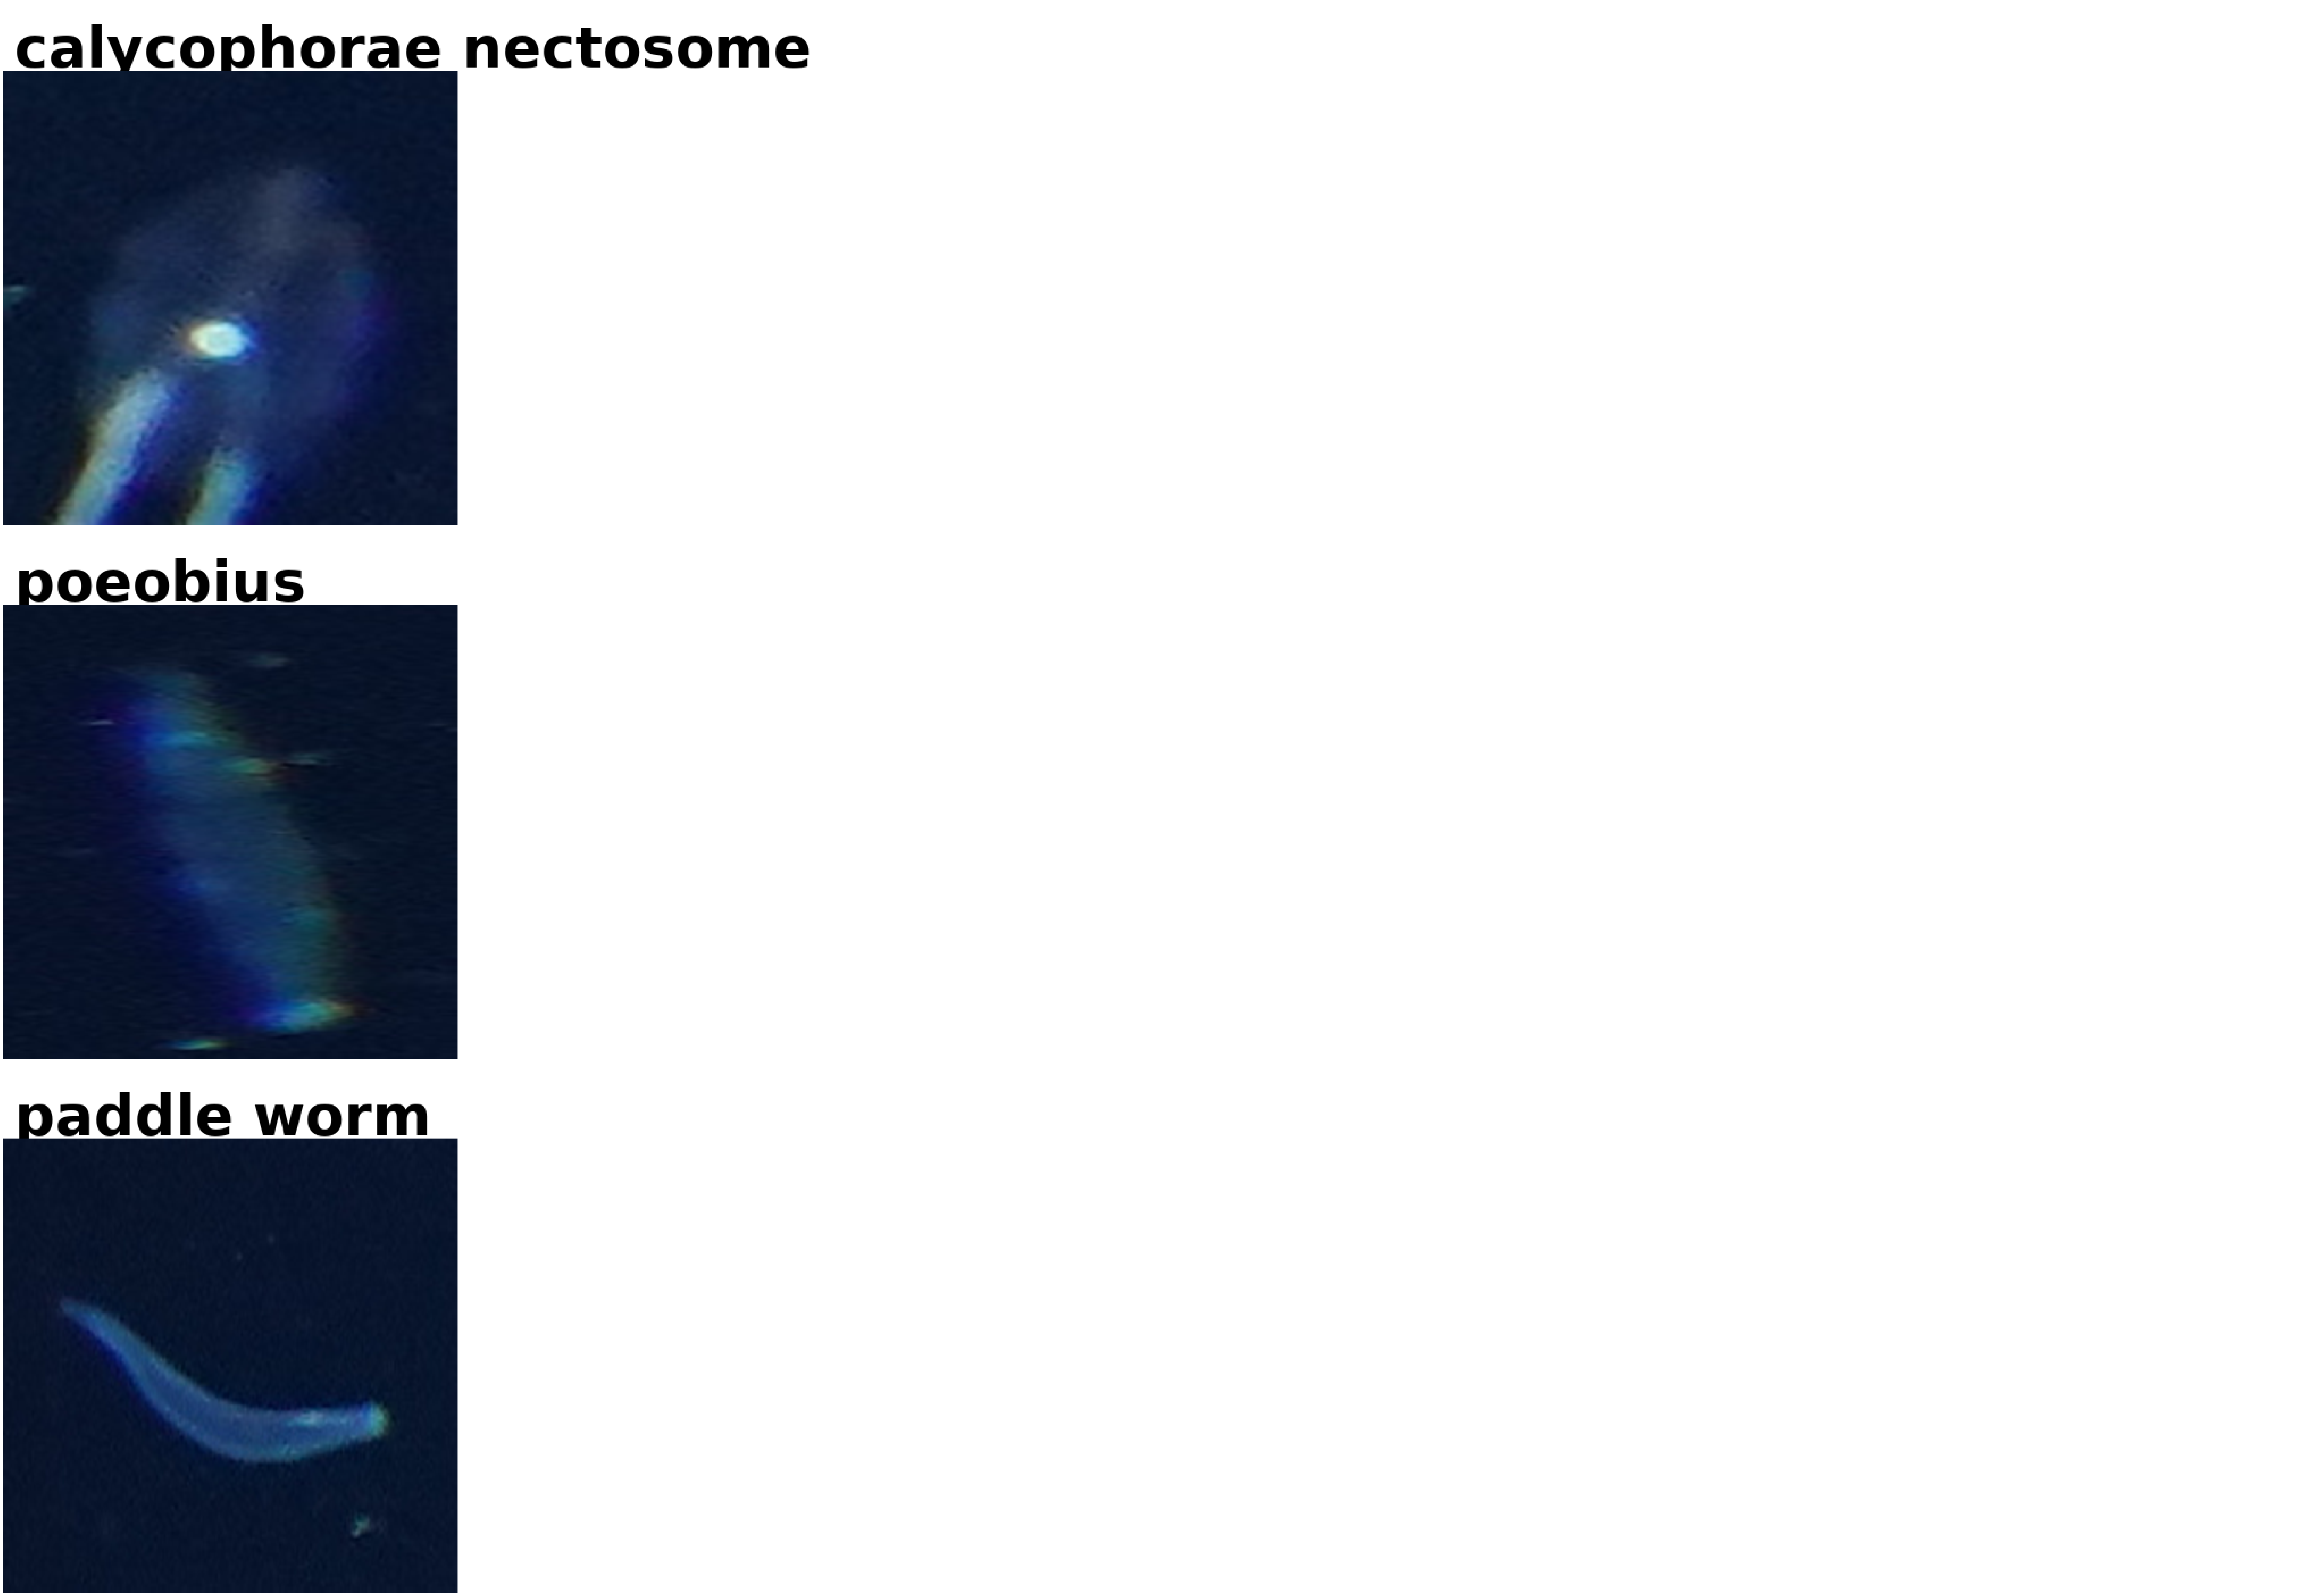

In [99]:
# Create a final image to hold all subfolder grids
final_width = max(img.width for img in grid_images)
final_height = sum(img.height for img in grid_images) + (len(grid_images) - 1) * padding

# Create the final image
final_image = Image.new('RGB', (final_width, final_height), color='white')

# Paste grid images into the final image
current_height = 0
for img in grid_images:
    final_image.paste(img, (0, current_height))
    current_height += img.height + padding

# Display the final image
plt.figure(figsize=(100, 100))
plt.imshow(final_image)
plt.axis('off')
plt.show()

In [100]:
final_image.save('/scratch/nf33/bz5571/Station27/Mosaic_image_Station27.png')
